![](https://cdn.shopify.com/s/files/1/0053/6513/7472/products/newyorkcitysunset911.jpg?v=1544036357)
([Image Source](https://gettyphotography.com/products/new-york-city-empire-state-building-sunset-911))
# Ackowlegement 
This Notebook would not have been possible without the fantastic dataset provided by [Kaggle](https://www.kaggle.com/). Also, shoutout to the volunteers who helpped us with this project [here](https://www.kaggle.com/josephassaker/covid19-global-dataset). 


# Introduction

It has been over a full year since we started this difficult battle against Covid-19 and it has cost us dearly. These fast-spreading microscopic creatures that are too small to be even be seen with the naked eye have somehow shaken the entire world and changed life as we know it. 

People all over the world are racing against the clock to fight this pandemic. We, the bright minds of Kaggle can do our part by using our skills to generate powerful insight that can make the lives of those affected a little better. 

Every day, there's an abundance of data being made publicly available on Kaggle, each one containing different statistics surrounding the Covid-19 pandemic. The goal in this notebook, is to bring two such datasets together and generate a holistic view on how we, as a species have been fighting this virus. 

I will update it often to make sure it contains the most relevant information. Feel free to leave any ideas or links to other datasets and notebooks that you feel would benefit this notebook.

If you like this notebook and the approach, an **upvote** would be massively encouraging! Cheers. 

## Technology Stack
In this analysis, I used python as the primary programming language because of its rich palette of tools that make data analysis a cinch. Some of the python packages I used are:
1. Plotly is an extremely versatile library of tools for generating interactive plots that are easy to interpret and customise
2. Numpy is a popular library used for array manipulation and vector operations. It is used extensively across python projects that require scientific computing.
3. Pandas is another library for data science that is just as popular as numpy. It provides easy to use data structures and functions to manipulate structured data.


These tools are well documented and come with several examples that make it easy to start using them. You can check out the linked documentation pages for more information.

In [3]:
import pandas as pd
import numpy as np 
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import HeatMap

In [4]:
# load data
df = pd.read_csv('../AB_NYC_2019.csv')

# Data Cleaning

The most important step to take before we get started geenrating any kind of information from all these data sources, it is first important to clean our data and make sure that the datasets are compatible with each other. Since most of the data is divided on a country-by-country basis, we must make sure that all the country names have the same formatting. 

For instance, "United States of America" may be written as "USA", "United Kingdom" as "UK" and so on. We will explore this problem and others in this section. We will prioritize only those countries for which vaccination data is available since most countries have either not yet started vaccinations or do not yet have sufficiently available public data.

## Standardize Country Names

### Steps followed:
- Identify the differences 
- Plan on how to unify them 
- Implement in code 

In [3]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [5]:
df.isna().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [6]:
df.describe()

id       host_id      latitude     longitude         price  \
count  4.889500e+04  4.889500e+04  48895.000000  48895.000000  48895.000000   
mean   1.901714e+07  6.762001e+07     40.728949    -73.952170    152.720687   
std    1.098311e+07  7.861097e+07      0.054530      0.046157    240.154170   
min    2.539000e+03  2.438000e+03     40.499790    -74.244420      0.000000   
25%    9.471945e+06  7.822033e+06     40.690100    -73.983070     69.000000   
50%    1.967728e+07  3.079382e+07     40.723070    -73.955680    106.000000   
75%    2.915218e+07  1.074344e+08     40.763115    -73.936275    175.000000   
max    3.648724e+07  2.743213e+08     40.913060    -73.712990  10000.000000   

       minimum_nights  number_of_reviews  reviews_per_month  \
count    48895.000000       48895.000000       38843.000000   
mean         7.029962          23.274466           1.373221   
std         20.510550          44.550582           1.680442   
min          1.000000           0.000000           0.010000   
25%          1.000000           1.000000           0.190000   
50%          3.000000           5.000000           0.720000   
75%          5.000000          24.000000           2.020000   
max       1250.000000         629.000000          58.500000   

       calculated_host_listings_count  availability_365  
count                    48895.000000      48895.000000  
mean                         7.143982        112.781327  
std                         32.952519        131.622289  
min                          1.000000          0.000000  
25%                          1.000000          0.000000  
50%                          1.000000         45.000000  
75%                          2.000000        227.000000  
max                        327.000000        365.000000

## What should we look into / errors?
- some rows have price of 0 (min price);
- some rows have price of 10000 dollars per night (max price); 
- there is a minimum nights reqirement stay of 1250 days (max minimum_nights);
- 0 days availability for the year (min availability_365);

In [7]:
df.head()

id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595                             Skylit Midtown Castle     2845   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   

     host_name neighbourhood_group neighbourhood  latitude  longitude  \
0         John            Brooklyn    Kensington  40.64749  -73.97237   
1     Jennifer           Manhattan       Midtown  40.75362  -73.98377   
2    Elisabeth           Manhattan        Harlem  40.80902  -73.94190   
3  LisaRoxanne            Brooklyn  Clinton Hill  40.68514  -73.95976   
4        Laura           Manhattan   East Harlem  40.79851  -73.94399   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0     Private room    149               1                  9  2018-10-19   
1  Entire home/apt    225               1                 45  2019-05-21   
2     Private room    150               3                  0         NaN   
3  Entire home/apt     89               1                270  2019-07-05   
4  Entire home/apt     80              10                  9  2018-11-19   

   reviews_per_month  calculated_host_listings_count  availability_365  
0               0.21                               6               365  
1               0.38                               2               355  
2                NaN                               1               365  
3               4.64                               1               194  
4               0.10                               1                 0

## Host Information

In [10]:
print('number of unique host: ', len(df['host_id'].unique()))
df['host_id'].value_counts()

number of unique host:  37457


219517861    327
107434423    232
30283594     121
137358866    103
12243051      96
            ... 
1641589        1
4070519        1
208106618      1
235939247      1
1288080        1
Name: host_id, Length: 37457, dtype: int64

## Information per neighbourhood (neighbourhood_group)

In [11]:
df['neighbourhood_group'].value_counts()

Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: neighbourhood_group, dtype: int64

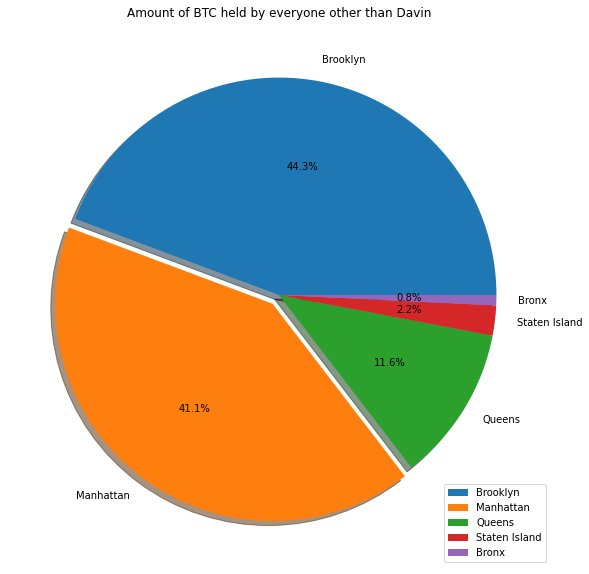

In [12]:
fig, axes = plt.subplots(figsize=(10,10))
axes.set(title="Amount of BTC held by everyone other than Davin")
axes.pie(df['neighbourhood_group'].value_counts(), labels=df["neighbourhood_group"].unique(),explode=[0,0.05,0,0,0],autopct='%1.1f%%',shadow=True)
plt.legend()
plt.show()

In [13]:
# number of different neighbourhood
len(df['neighbourhood'].unique())

221

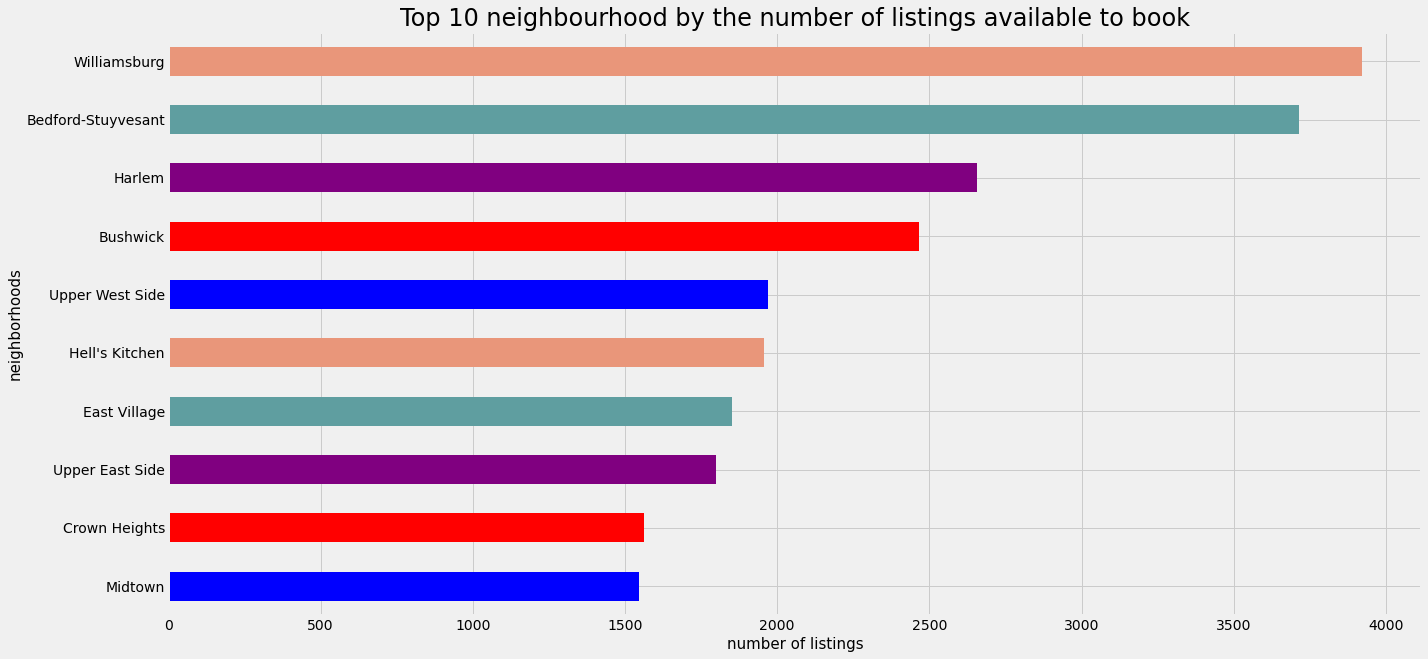

In [14]:
from matplotlib import style

plt.style.use('fivethirtyeight')
fig,ax=plt.subplots(figsize=(20,10))
color = ("blue", "red", "purple",'cadetblue','darksalmon')
df.neighbourhood.value_counts().sort_values(ascending=False)[:10].sort_values().plot(kind='barh',color=color)
ax.set_title("Top 10 neighbourhood by the number of listings available to book",size=24)
ax.set_xlabel('number of listings',size=15)
ax.set_ylabel('neighborhoods', size=15)
plt.show()

These are the 10 neighborhoods that have most listings, most rooms avaliable, apparently they are very popular.

**Room Types**

Text(0.5, 1.0, 'Room Type')

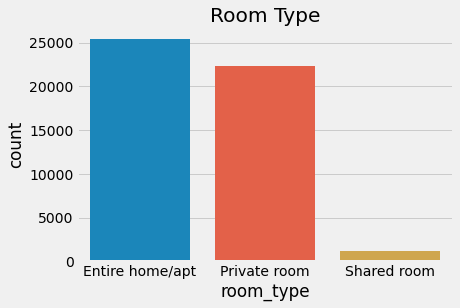

In [15]:
sns.countplot('room_type',data=df,order=df['room_type'].value_counts().index).set_title('Room Type')

This is a breakdown of the type of room/apt offered. As we can see these are mostly Entire Apartments or Private Rooms. There are very few Shared Rooms offered as an option for renting on AirBnb.

**Price**

Text(0.5, 1.0, 'Price < $300')

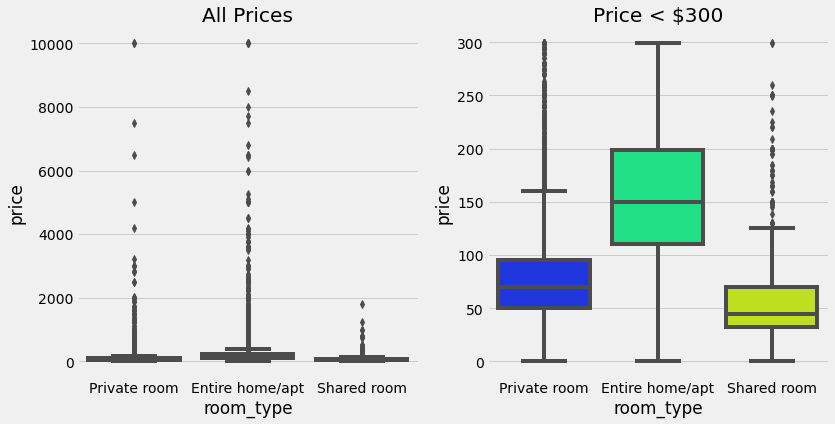

In [16]:
fig, [ax1, ax2] = plt.subplots(1,2, figsize=(12,6))
sns.boxplot(data=df, x='room_type', y='price', palette='gist_rainbow_r', ax=ax1).set_title('All Prices') 
sns.boxplot(data=df.loc[df['price'] < 300], x='room_type', y='price', palette='gist_rainbow_r', ax=ax2).set_title('Price < $300')

It seems that there are a few price outliers of $10000, let's see how many and what they are.

In [17]:
df.sort_values(by=['price'], ascending=False).head(20)

#schoud we just drop row=9151?

id                                               name    host_id  \
9151    7003697                Furnished room in Astoria apartment   20582832   
17692  13894339    Luxury 1 bedroom apt. -stunning Manhattan views    5143901   
29238  22436899                                1-BR Lincoln Center   72390391   
40433  31340283  2br - The Heart of NYC: Manhattans Lower East ...    4382127   
12342   9528920                Quiet, Clean, Lit @ LES & Chinatown    3906464   
6530    4737930                                 Spanish Harlem Apt    1235070   
30268  23377410  Beautiful/Spacious 1 bed luxury flat-TriBeCa/Soho   18128455   
4377    2953058                                      Film Location    1177497   
29662  22779726          East 72nd Townhouse by (Hidden by Airbnb)  156158778   
42523  33007610                70' Luxury MotorYacht on the Hudson    7407743   
45666  34895693                               Gem of east Flatbush  262534951   
44034  33998396                   3000 sq ft daylight photo studio    3750764   
37194  29547314               Apartment New York \nHell’s Kitchens   35303743   
3774    2271504                   SUPER BOWL Brooklyn Duplex Apt!!   11598359   
48043  36056808       Luxury TriBeCa Apartment at an amazing price  271248669   
29664  22780103          Park Avenue Mansion by (Hidden by Airbnb)  156158778   
3537    2110145                 UWS 1BR w/backyard + block from CP    2151325   
15560  12520066                 Luxury townhouse Greenwich Village   66240032   
3720    2243699                SuperBowl Penthouse Loft 3,000 sqft    1483320   
43009  33397385    Midtown Manhattan great location (Gramacy park)   16105313   

         host_name neighbourhood_group      neighbourhood  latitude  \
9151      Kathrine              Queens            Astoria  40.76810   
17692         Erin            Brooklyn         Greenpoint  40.73260   
29238       Jelena           Manhattan    Upper West Side  40.77213   
40433         Matt           Manhattan    Lower East Side  40.71980   
12342          Amy           Manhattan    Lower East Side  40.71355   
6530         Olson           Manhattan        East Harlem  40.79264   
30268          Rum           Manhattan            Tribeca  40.72197   
4377       Jessica            Brooklyn       Clinton Hill  40.69137   
29662        Sally           Manhattan    Upper East Side  40.76824   
42523         Jack           Manhattan  Battery Park City  40.71162   
45666       Sandra            Brooklyn      East Flatbush  40.65724   
44034        Kevin           Manhattan            Chelsea  40.75060   
37194     Patricia           Manhattan    Upper West Side  40.76835   
3774      Jonathan            Brooklyn       Clinton Hill  40.68766   
48043        Jenny           Manhattan            Tribeca  40.71206   
29664        Sally           Manhattan    Upper East Side  40.78517   
3537   Jay And Liz           Manhattan    Upper West Side  40.77782   
15560        Linda           Manhattan  Greenwich Village  40.73046   
3720          Omri           Manhattan       Little Italy  40.71895   
43009        Debra           Manhattan            Midtown  40.74482   

       longitude        room_type  price  minimum_nights  number_of_reviews  \
9151   -73.91651     Private room  10000             100                  2   
17692  -73.95739  Entire home/apt  10000               5                  5   
29238  -73.98665  Entire home/apt  10000              30                  0   
40433  -73.98566  Entire home/apt   9999              30                  0   
12342  -73.98507     Private room   9999              99                  6   
6530   -73.93898  Entire home/apt   9999               5                  1   
30268  -74.00633  Entire home/apt   8500              30                  2   
4377   -73.96723  Entire home/apt   8000               1                  1   
29662  -73.95989  Entire home/apt   7703               1                  0   
42523  -74.01693  Entire home

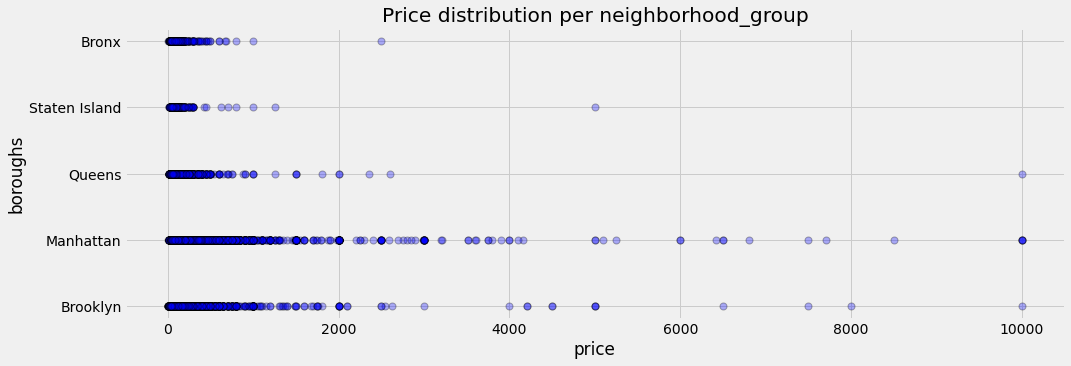

In [18]:
x = df['price'].values
y = df['neighbourhood_group'].values
plt.style.use('fivethirtyeight')
fig, ax = plt.subplots(figsize=(15,5))
ax.scatter(x,y, s=50, c="b", alpha=0.3, edgecolors="black", linewidth=1)
ax.set_xlabel('price')
ax.set_ylabel('boroughs')
ax.set_title('Price distribution per neighborhood_group')
plt.show()

Locating prices that may be a mistake

In [19]:
df.loc[df['price'] < 10]

id                                               name    host_id  \
23161  18750597  Huge Brooklyn Brownstone Living, Close to it all.    8993084   
25433  20333471      ★Hostel Style Room | Ideal Traveling Buddies★  131697576   
25634  20523843    MARTIAL LOFT 3: REDEMPTION (upstairs, 2nd room)   15787004   
25753  20608117                    Sunny, Quiet Room in Greenpoint    1641537   
25778  20624541      Modern apartment in the heart of Williamsburg   10132166   
25794  20639628  Spacious comfortable master bedroom with nice ...   86327101   
25795  20639792  Contemporary bedroom in brownstone with nice view   86327101   
25796  20639914       Cozy yet spacious private brownstone bedroom   86327101   
26259  20933849                              the best you can find   13709292   
26841  21291569  Coliving in Brooklyn! Modern design / Shared room  101970559   
26866  21304320             Best Coliving space ever! Shared room.  101970559   

          host_name neighbourhood_group       neighbourhood  latitude  \
23161      Kimberly            Brooklyn  Bedford-Stuyvesant  40.69023   
25433        Anisha               Bronx     East Morrisania  40.83296   
25634  Martial Loft            Brooklyn            Bushwick  40.69467   
25753        Lauren            Brooklyn          Greenpoint  40.72462   
25778       Aymeric            Brooklyn        Williamsburg  40.70838   
25794       Adeyemi            Brooklyn  Bedford-Stuyvesant  40.68173   
25795       Adeyemi            Brooklyn  Bedford-Stuyvesant  40.68279   
25796       Adeyemi            Brooklyn  Bedford-Stuyvesant  40.68258   
26259        Qiuchi           Manhattan         Murray Hill  40.75091   
26841        Sergii            Brooklyn            Bushwick  40.69211   
26866        Sergii            Brooklyn            Bushwick  40.69166   

       longitude        room_type  price  minimum_nights  number_of_reviews  \
23161  -73.95428     Private room      0               4                  1   
25433  -73.88668     Private room      0               2                 55   
25634  -73.92433     Private room      0               2                 16   
25753  -73.94072     Private room      0               2                 12   
25778  -73.94645  Entire home/apt      0               5                  3   
25794  -73.91342     Private room      0               1                 93   
25795  -73.91170     Private room      0               1                 95   
25796  -73.91284     Private room      0               1                 95   
26259  -73.97597  Entire home/apt      0               3                  0   
26841  -73.90670      Shared room      0              30                  2   
26866  -73.90928      Shared room      0              30                  5   

      last_review  reviews_per_month  calculated_host_listings_count  \
23161  2018-01-06               0.05                               4   
25433  2019-06-24               2.56                               4   
25634  2019-05-18               0.71                               5   
25753  2017-10-27               0.53                               2   
25778  2018-01-02               0.15                               1   
25794  2019-06-15               4.28                               6   
25795  2019-06-21               4.37                               6   
25796  2019-06-23               4.35                               6   
26259         NaN                NaN                               1   
26841  2019-06-22               0.11                               6   
26866  2019-05-24               0.26                               6   

       availability_365  
23161                28  
25433               127  
25634                 0  
25753                 0  
25778                73  
25794               176  
25795               232  
25796               222  
26259                 0  
26841               333  
26866               139

In [20]:
#df.drop(df['price'] < 10, axis = 1, inplace = True)

Also, let's drop last_review and reviews_per_month since they have lots of missing values (or better, lets fill the up with 0s since these are probably new properties.)

In [21]:
#df.drop(['last_review', 'reviews_per_month'], axis = 1, inplace = True)
#or
# df['last_review'].dropna(inplace = True)
# df['reviews_per_month'].dropna(inplace = True)
#or
# df.fillna(value = {'last_review':0}, inplace = True)
# df.fillna(value={'reviews_per_month':0}, inplace = True)

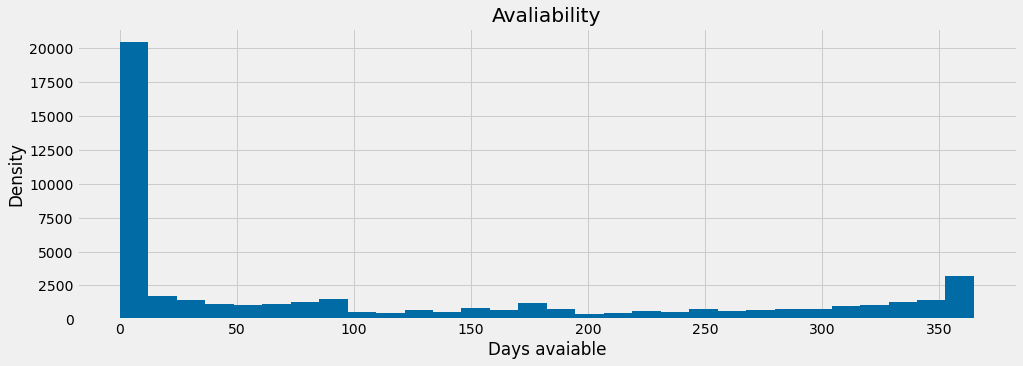

In [22]:
plt.style.use('tableau-colorblind10')
fig, ax = plt.subplots(figsize=(15,5))
plt.hist(df['availability_365'], bins = 30)
plt.title('Avaliability')
plt.xlabel('Days avaiable')
plt.ylabel('Density') 
plt.show()

Most listings are avaliable short-term (more than 2 weeks)

In [15]:
len(df[df['availability_365'] == 0])

17533

A lot of Listings have 0 days availability, probably because they were either fully booked or because they were frozen/currently not being rented at the time this dataset was created. They are most likely not wrong values.

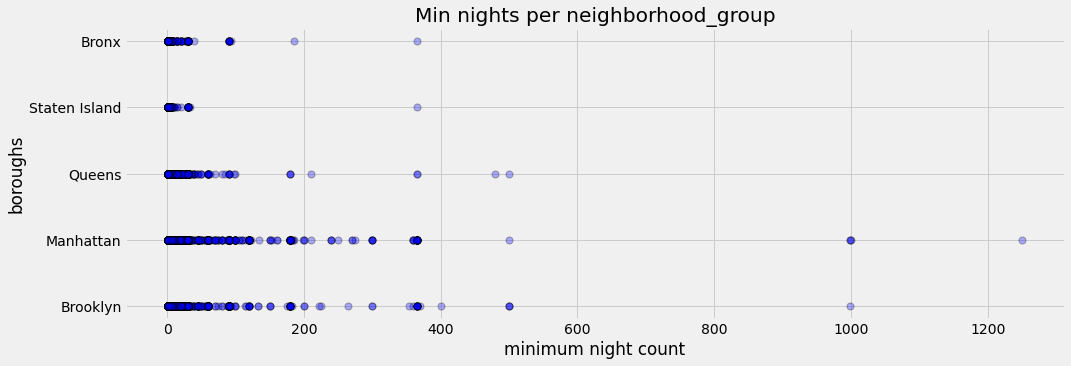

In [23]:
x = df['minimum_nights'].values
y = df['neighbourhood_group'].values
plt.style.use('fivethirtyeight')
fig, ax = plt.subplots(figsize=(15,5))
ax.scatter(x,y, s=50, c="b", alpha=0.3, edgecolors="black", linewidth=1)
ax.set_xlabel('minimum night count')
ax.set_ylabel('boroughs')
ax.set_title('Min nights per neighborhood_group')
plt.show()

There are definitely values that need to be removed, is it realistic to have minimum night requirement of 1200? For sure not. How about 400  or 200 night required as a minimum stay? Not really realistic. For the pupose of our model we will get rid of values more than 90.

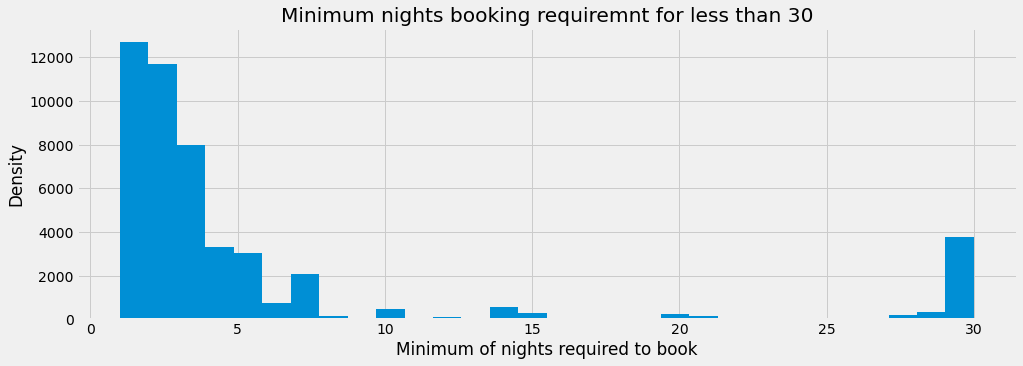

In [24]:
fig, ax = plt.subplots(figsize=(15,5))
plt.hist(df[(df['minimum_nights'] <= 30) & (df['minimum_nights'] > 0)]['minimum_nights'], bins = 30)
plt.title('Minimum nights booking requiremnt for less than 30')
plt.xlabel('Minimum of nights required to book')
plt.ylabel('Density')
plt.show()

These represent some of the most common values for minimum nights rquirement.

In [25]:
df['minimum_nights'].median()

3.0

In [26]:
df['minimum_nights'].mean()

7.029962163820431

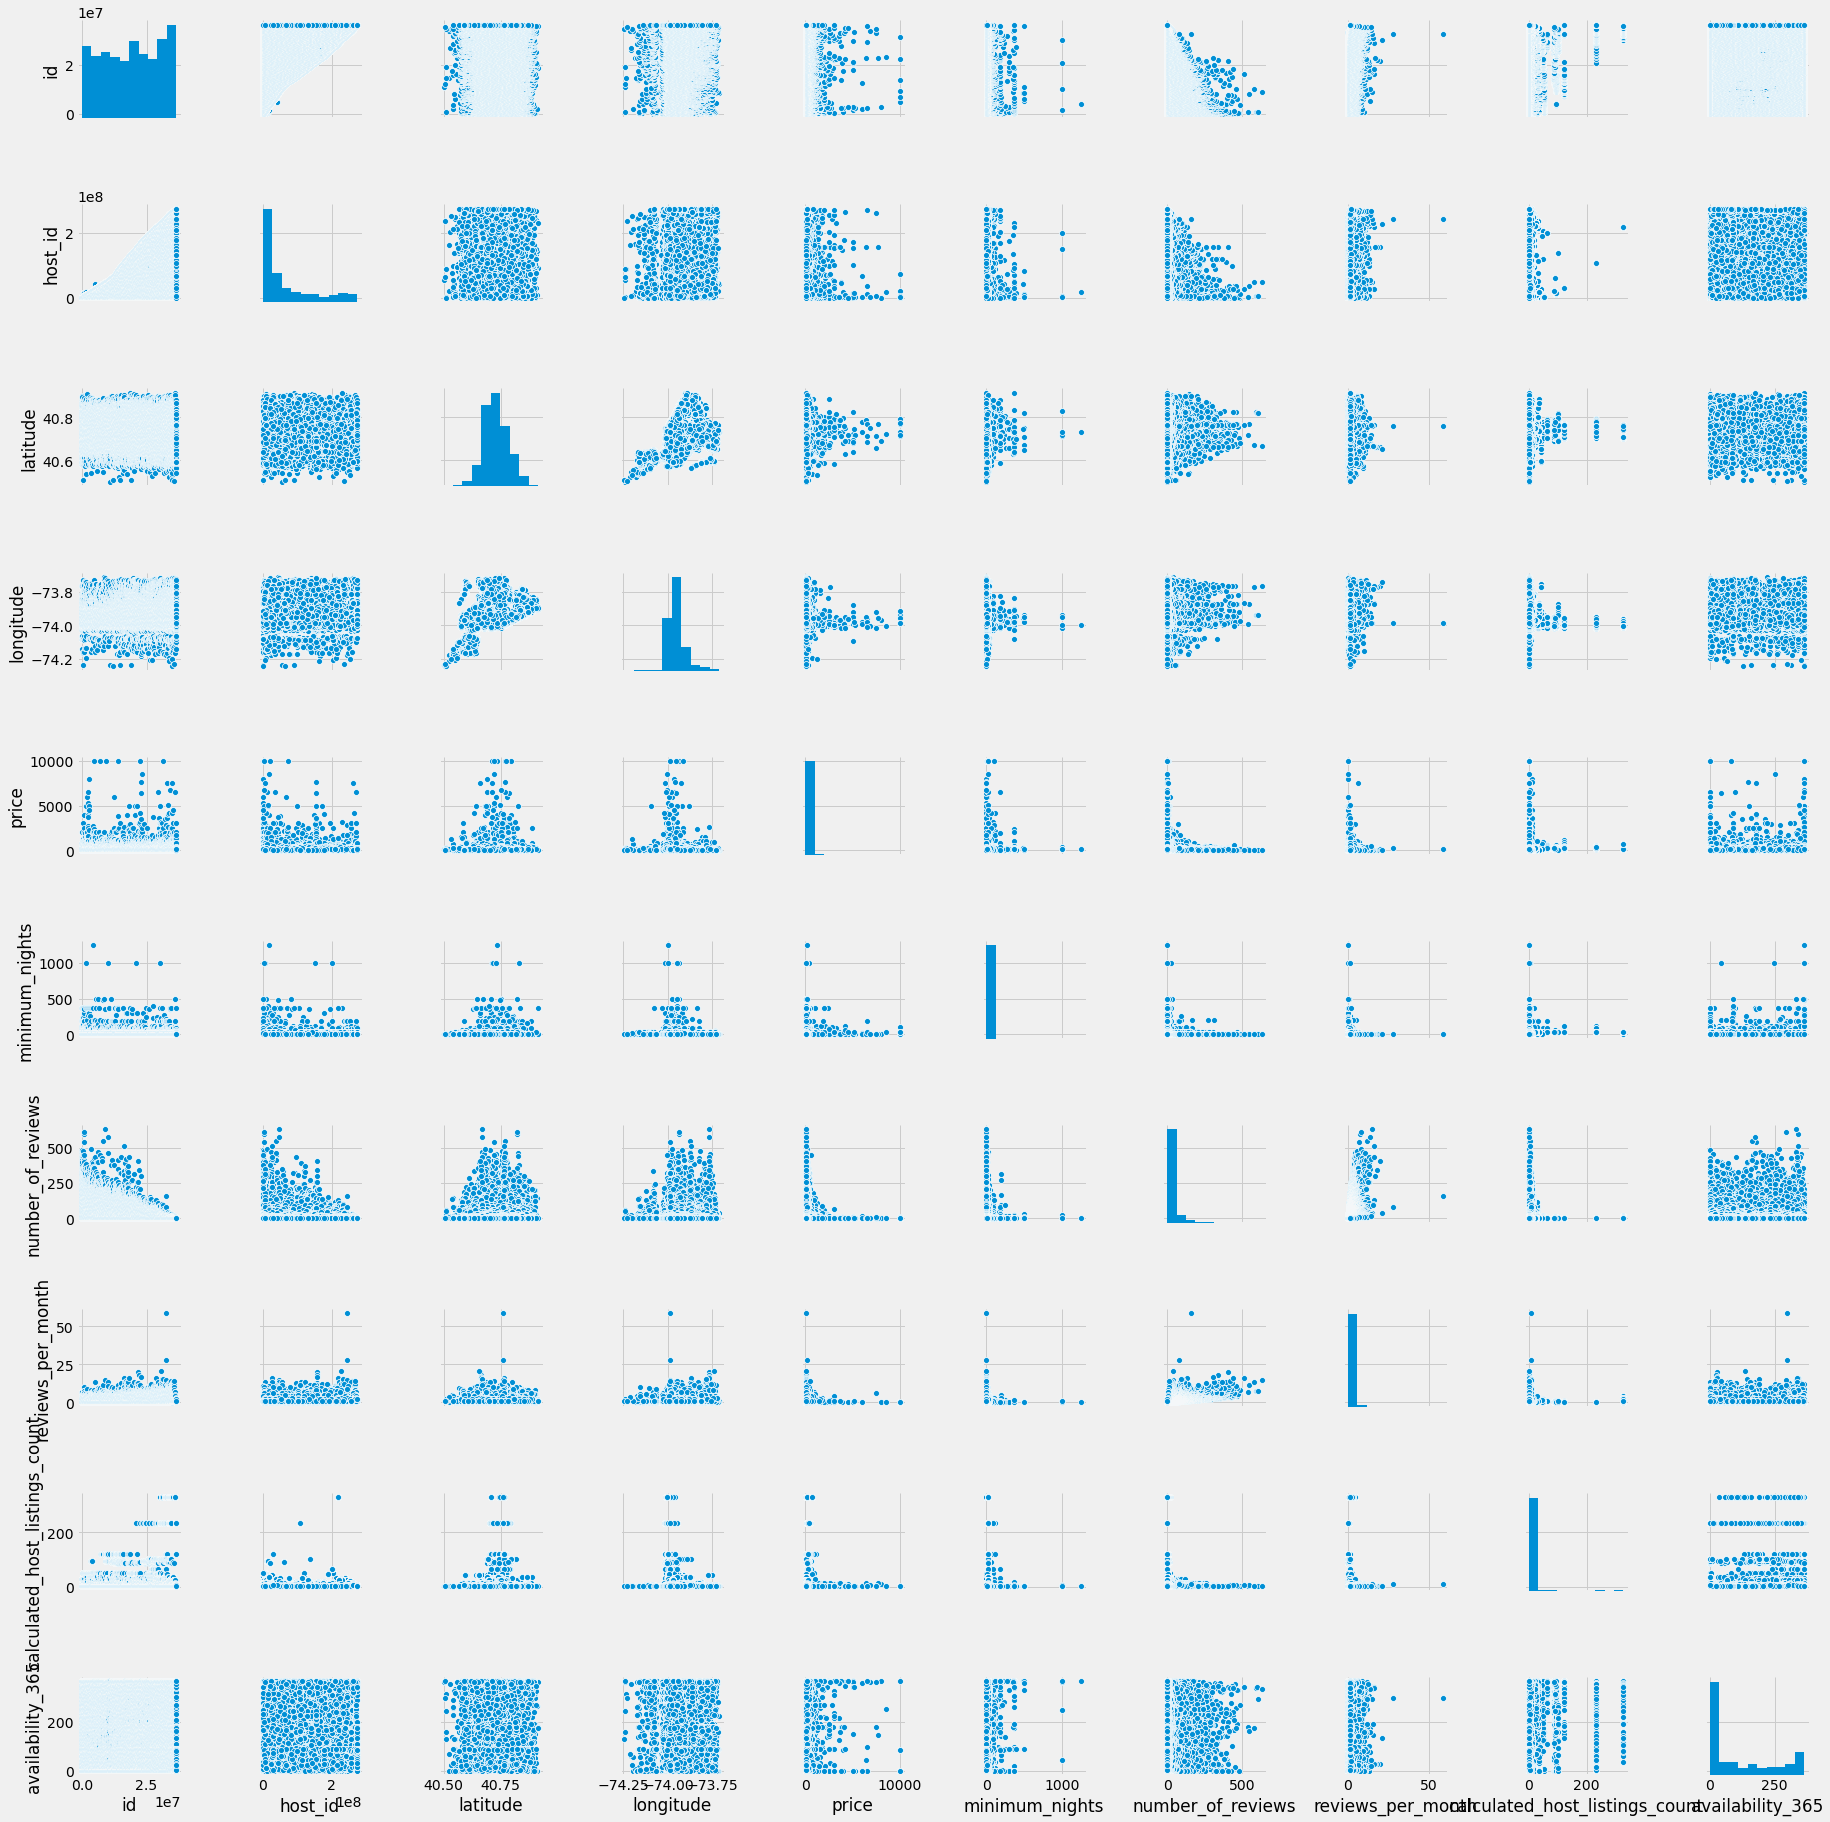

In [27]:
sns.pairplot(df)

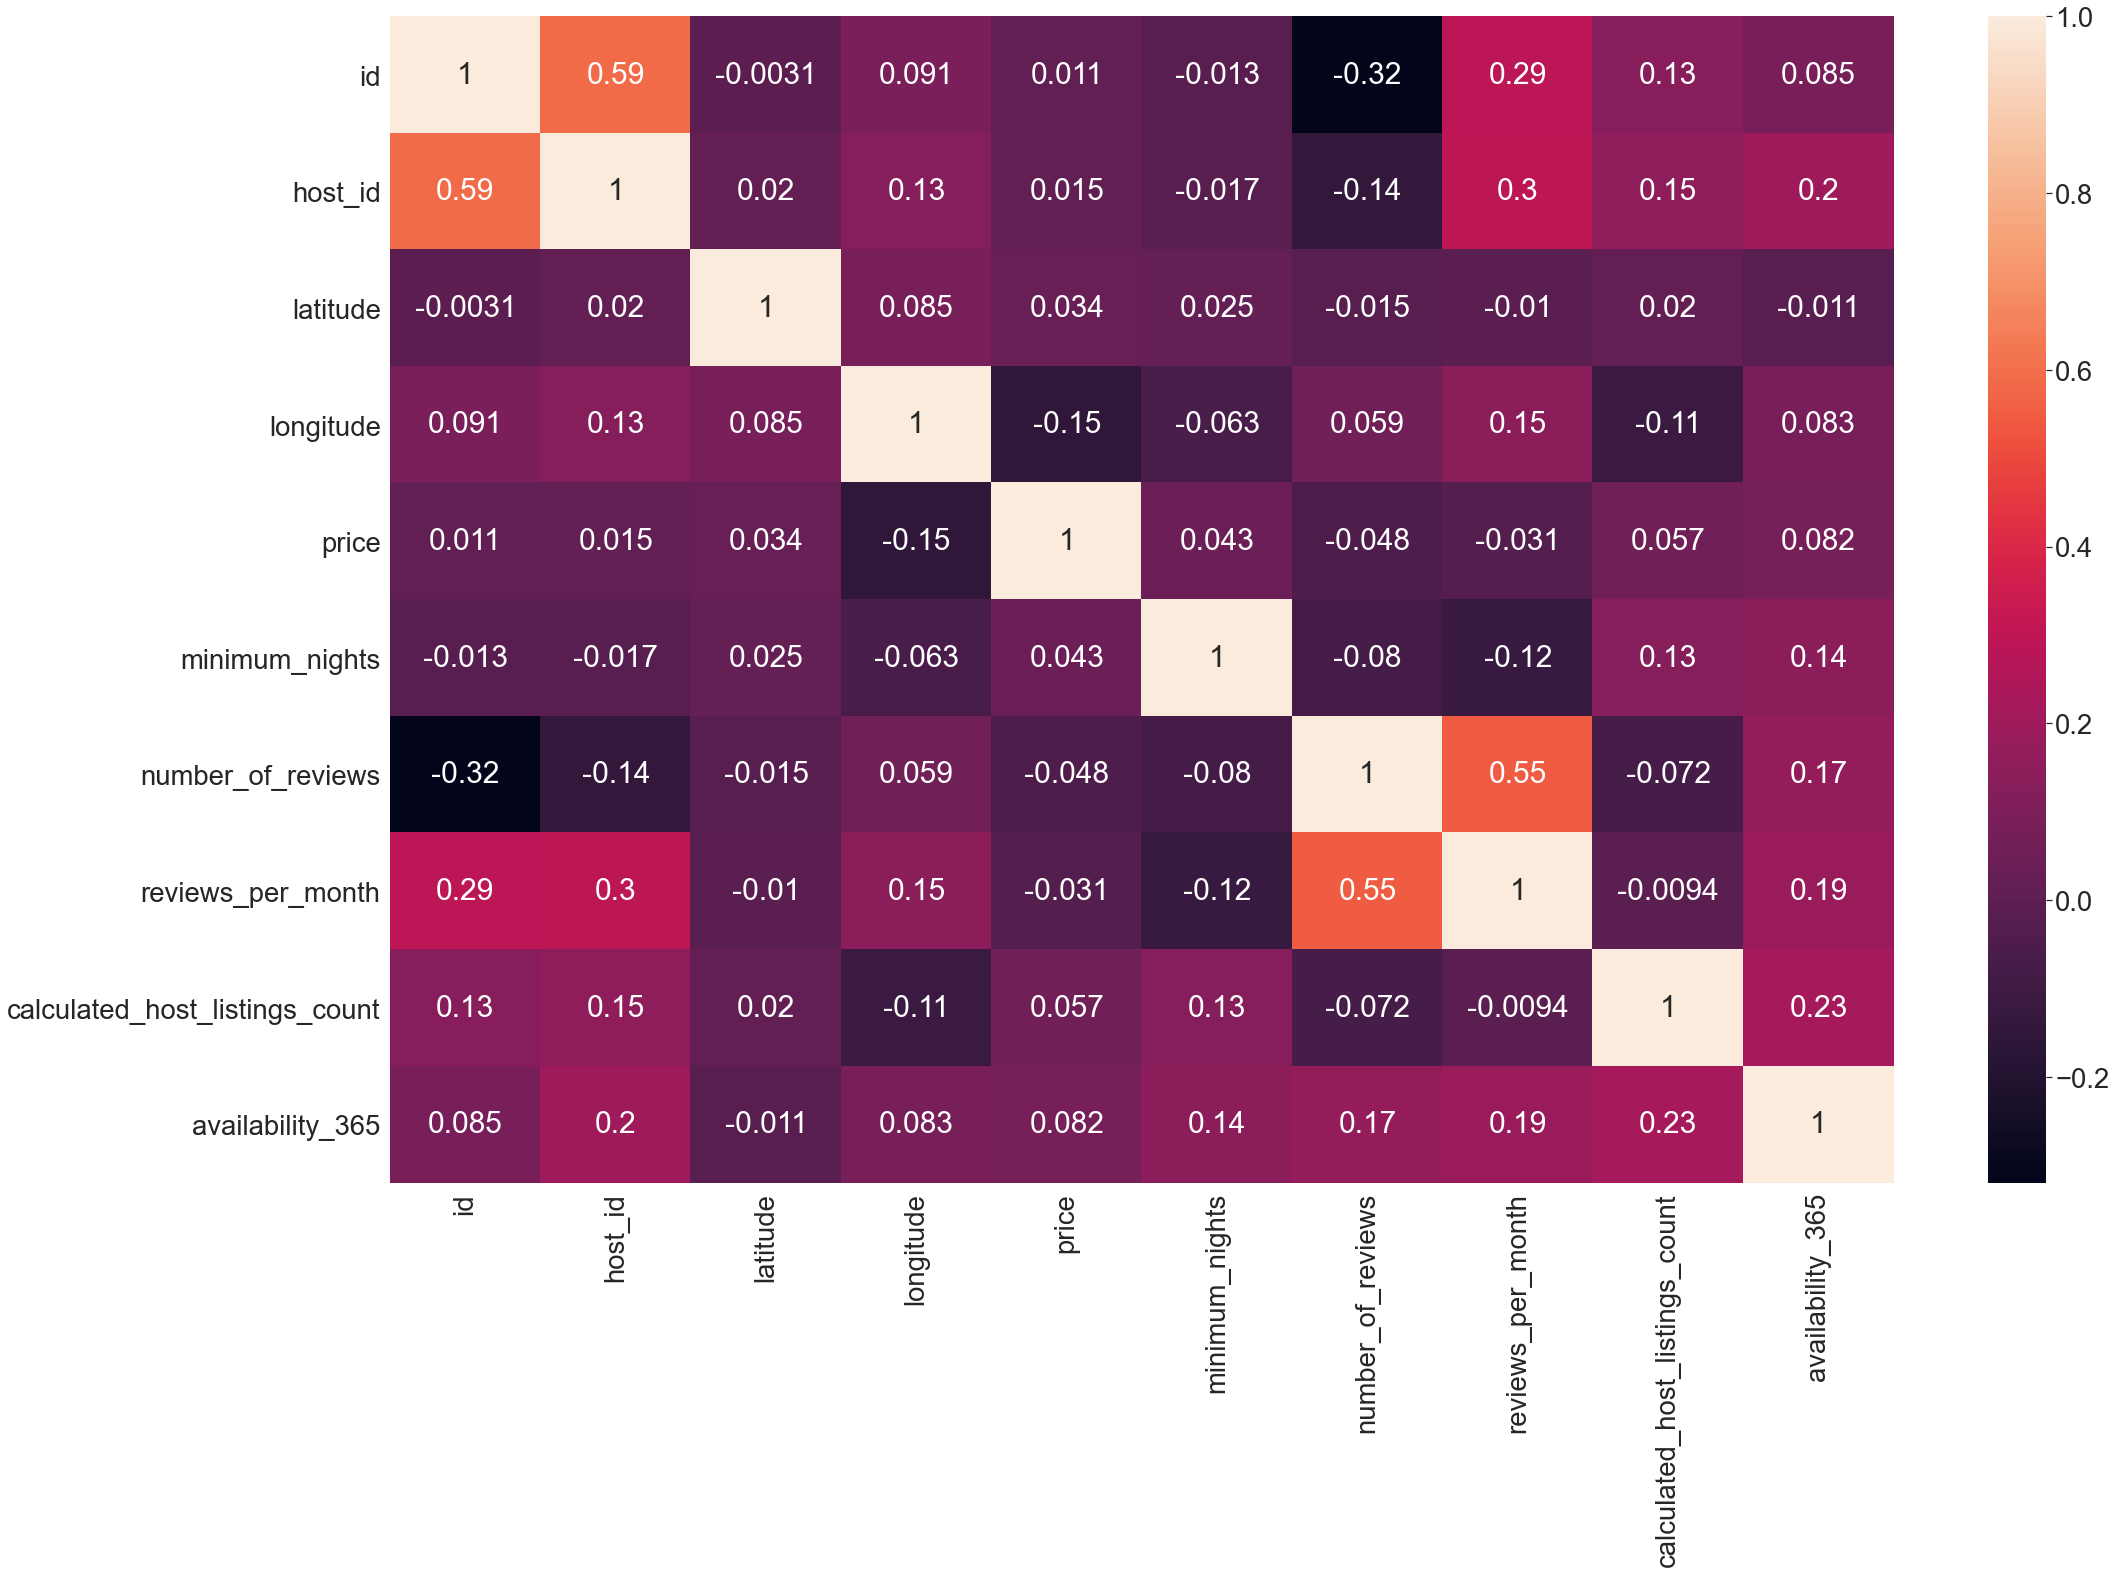

In [28]:
sns.set(font_scale=2.5)
plt.figure(figsize=(30,20))
sns.heatmap(df.corr(), annot=True)

Correlation Bar Graph of price with other features

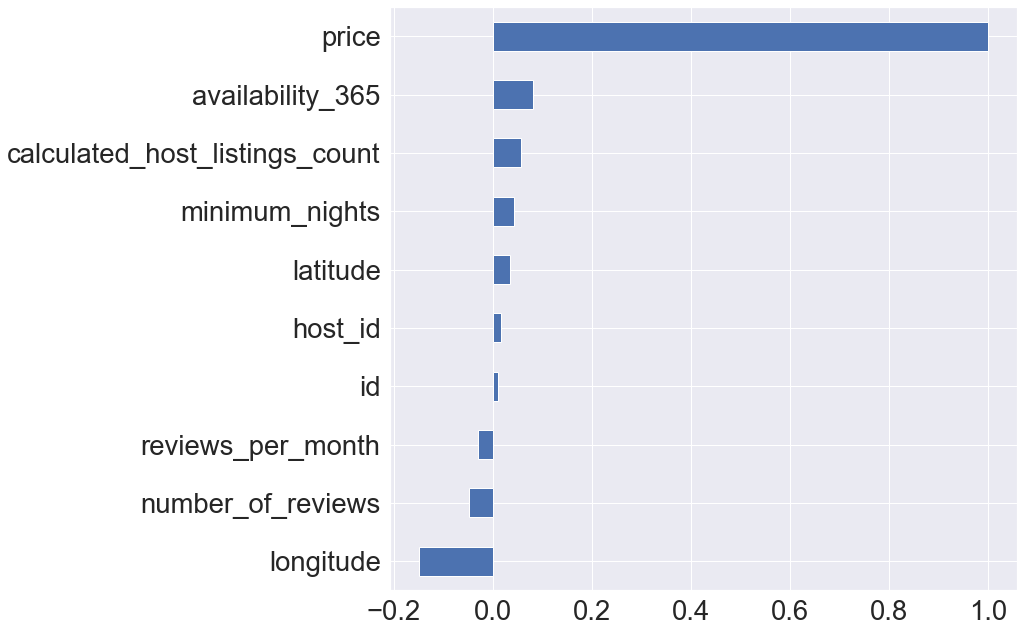

In [29]:
plt.figure(figsize=(10,10))
df.corr()["price"].sort_values().plot(kind="barh")

Aibnb Listing Distribution on a Heatmap

In [32]:
data = folium.Map([40.7128,-74.0060],zoom_start=11)
HeatMap(df[['latitude','longitude']],radius=8,gradient={0.2:'blue',0.4:'purple',0.6:'orange',1.0:'red'}).add_to(data)
display(data)

The highest Density areas are marked in red and lowest density areas are marked in blue color

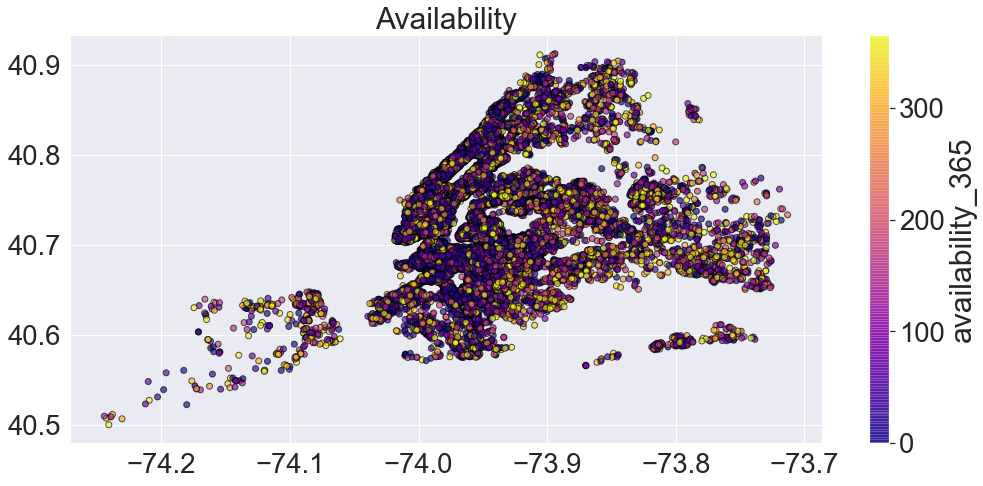

In [33]:
plt.figure(figsize=(15,7))
plt.scatter(df.longitude, df.latitude, c=df.availability_365, cmap='plasma', edgecolor='black', linewidth=1, alpha=0.65)
cbar = plt.colorbar()
cbar.set_label('availability_365')
plt.title('Availability')
plt.show()

The Yellow color on the map shows the places which have more availability throughout the year, meaning that they are being rented throughout the whole year as opposed to on seasonal or weekly basis.

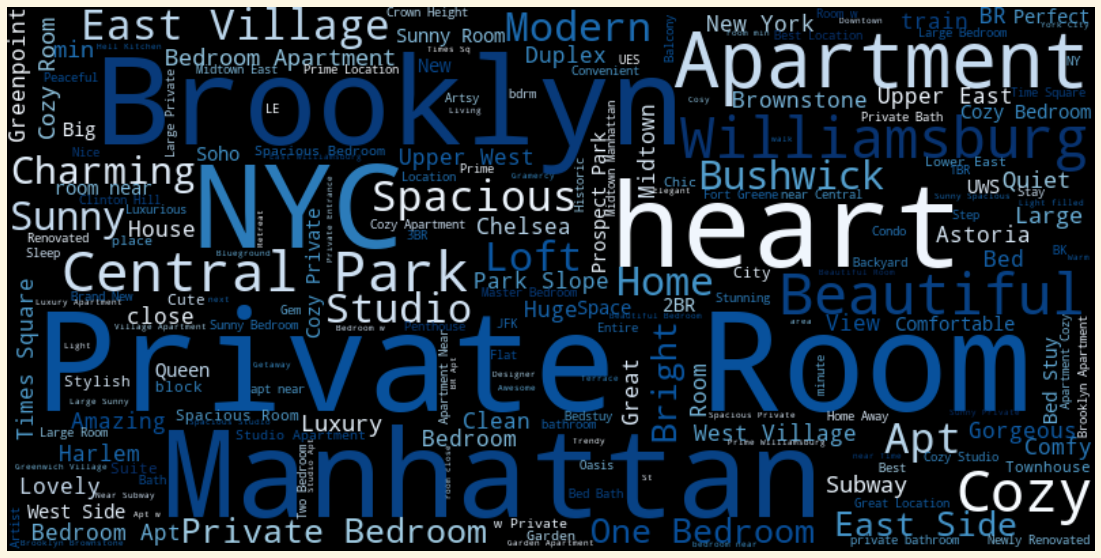

In [33]:
#word cloud
from wordcloud import WordCloud, ImageColorGenerator
from PIL import Image
text = " ".join(str(each) for each in df.name)
# Create and generate a word cloud image:
wordcloud = WordCloud(width=800, height=400, margin=0,colormap='Blues').generate(text)
# Display the generated image:
plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

In [ ]:
#this cloud be our banner at the end